<a href="https://colab.research.google.com/github/shinevol53/BlogAnalysis/blob/main/KNOU_2021_2_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%98%ED%86%B5%EA%B3%84%EC%A0%81%EC%9D%B4%ED%95%B4_%EC%A4%91%EA%B0%84%EA%B3%BC%EC%A0%9C%EB%AC%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.utils import plot_model

In [4]:
### MNIST 데이터를 읽고 그래프로 살펴보기

In [5]:
mnist = datasets.mnist


(train_x, train_y), (test_x, test_y) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [10]:
train_x, test_x = train_x /255.0, test_x / 255.0

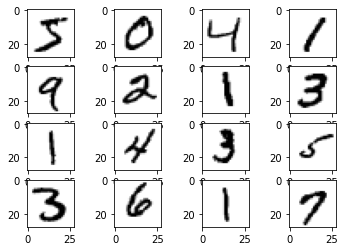

In [14]:
import matplotlib.pyplot as plt
for col1 in range(16):
  plt.subplot(4, 4, col1+1)
  plt.imshow(train_x[col1].reshape(28, 28), cmap=plt.cm.binary)

plt.show()

In [15]:
### 데이터 확인

In [16]:
digit = train_x[0]
print(type(digit))

print("digit: ", digit.shape)
print("train imgs : ", train_x.shape)
print("test imgs : ", test_x.shape)

<class 'numpy.ndarray'>
digit:  (28, 28)
train imgs :  (60000, 28, 28)
test imgs :  (10000, 28, 28)


In [17]:
### 완전연결 신경망의 작성

In [20]:
model1 = models.Sequential([
                            Flatten(input_shape=(28, 28)),
                            Dense(512, activation='relu'),
                            Dense(10, activation='softmax')
                            
                            ])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


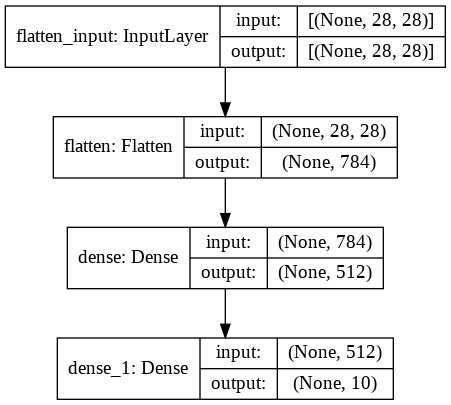

In [21]:
plot_model(model1, to_file="model1_mnist.png", show_shapes=True)

In [23]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model1.fit(train_x, train_y, epochs=12, batch_size=256, validation_split=0.25)


Epoch 1/12
176/176 [==============================] - 4s 17ms/step - loss: 0.3708 - accuracy: 0.8974 - val_loss: 0.2062 - val_accuracy: 0.9436
Epoch 2/12
176/176 [==============================] - 3s 16ms/step - loss: 0.1597 - accuracy: 0.9547 - val_loss: 0.1398 - val_accuracy: 0.9597
Epoch 3/12
176/176 [==============================] - 3s 16ms/step - loss: 0.1106 - accuracy: 0.9692 - val_loss: 0.1249 - val_accuracy: 0.9639
Epoch 4/12
176/176 [==============================] - 3s 16ms/step - loss: 0.0801 - accuracy: 0.9775 - val_loss: 0.1036 - val_accuracy: 0.9703
Epoch 5/12
176/176 [==============================] - 3s 16ms/step - loss: 0.0627 - accuracy: 0.9829 - val_loss: 0.0973 - val_accuracy: 0.9721
Epoch 6/12
176/176 [==============================] - 3s 16ms/step - loss: 0.0486 - accuracy: 0.9870 - val_loss: 0.0906 - val_accuracy: 0.9733
Epoch 7/12
176/176 [==============================] - 3s 16ms/step - loss: 0.0374 - accuracy: 0.9907 - val_loss: 0.0882 - val_accuracy: 0.9736

In [24]:
sc = model1.evaluate(test_x, test_y)
print("accuracy : ", sc[1], "  loss: ", sc[0])

313/313 [==============================] - 1s 2ms/step - loss: 0.0668 - accuracy: 0.9788
accuracy :  0.9787999987602234   loss:  0.06677386164665222


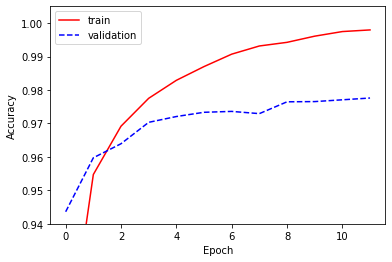

In [25]:
plt.plot(hist.history['accuracy'], 'r-')
plt.plot(hist.history['val_accuracy'], 'b--')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim([0.94, 1.005])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()